<a href="https://colab.research.google.com/github/IsabelenaVB/Business-Intelligence/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Descripción de las variables**
Durante este análisis se utilizó un total de 7 variables, de las cuales 6 se consideraron como variables de entrada y 1 como variable de salida. Estas variables fueron seleccionadas por su relevancia en los modelos de agrupamiento, clasificación y pronóstico de personalidad.

**Variables de entrada**

**Time spent Alone**
Representa la cantidad de horas que una persona pasa sola diariamente (rango de 0 a 11). Esta variable ayuda a medir el nivel de interacción social voluntaria y puede estar relacionada con la preferencia por la introspección o la compañía.

**Stage fear**
Indica si la persona presenta miedo escénico (valores: Sí / No). Esta variable puede ser un indicador de ansiedad social o de habilidades de comunicación en público, elementos asociados a la personalidad.

**Social event attendance**
Frecuencia con la que la persona asiste a eventos sociales (rango de 0 a 10). Este indicador permite evaluar la predisposición del individuo hacia actividades grupales y sociales.

**Going outside**
Número de veces que una persona sale al exterior semanalmente (rango de 0 a 7). Es una medida complementaria de actividad social y estilo de vida.

**Drained after socializing**
Describe si una persona se siente agotada luego de interactuar socialmente (valores: Sí / No). Este es un fuerte indicador del nivel de energía que consume la interacción social, clave para diferenciar entre personalidades extrovertidas e introvertidas.

**Friends circle size**
Cantidad de amigos cercanos que tiene una persona (rango de 0 a 15). Esta variable permite estimar el tamaño de la red social íntima del individuo.

**Post frequency**
Frecuencia con la que una persona publica en redes sociales (rango de 0 a 10). Puede reflejar el grado de comunicación y expresión social en entornos digitales.

**Variable de salida**

**Personality**
Es la variable objetivo del análisis, clasificada en dos categorías: extrovertido(1) o introvertido(0). Esta variable se utiliza para evaluar la capacidad predictiva de los modelos y explorar patrones conductuales relacionados con las características sociales y personales de los individuos.

#**Clustering K- Means**

0. Se procede con la carga de las librerías de trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#se procede con la implementacion del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se procede con la carga de los datos de trabajo.

In [21]:
nxl='/content/drive/MyDrive/SEMESTRE-6/personality_dataset.xlsx'
XDB=pd.read_excel(nxl)
XDB=XDB[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']]
XDB=XDB.dropna()

display(XDB)


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
0,4.0,4.0,6.0,13.0,5.0,1
1,9.0,0.0,0.0,0.0,3.0,0
2,9.0,1.0,2.0,5.0,2.0,0
3,0.0,6.0,7.0,14.0,8.0,1
4,3.0,9.0,4.0,8.0,5.0,1
...,...,...,...,...,...,...
2893,9.0,2.0,0.0,4.0,2.0,0
2895,3.0,7.0,6.0,6.0,6.0,1
2896,3.0,8.0,3.0,14.0,9.0,1
2897,4.0,1.0,1.0,4.0,0.0,0


2. Miramos correlaciones y variables importantes

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

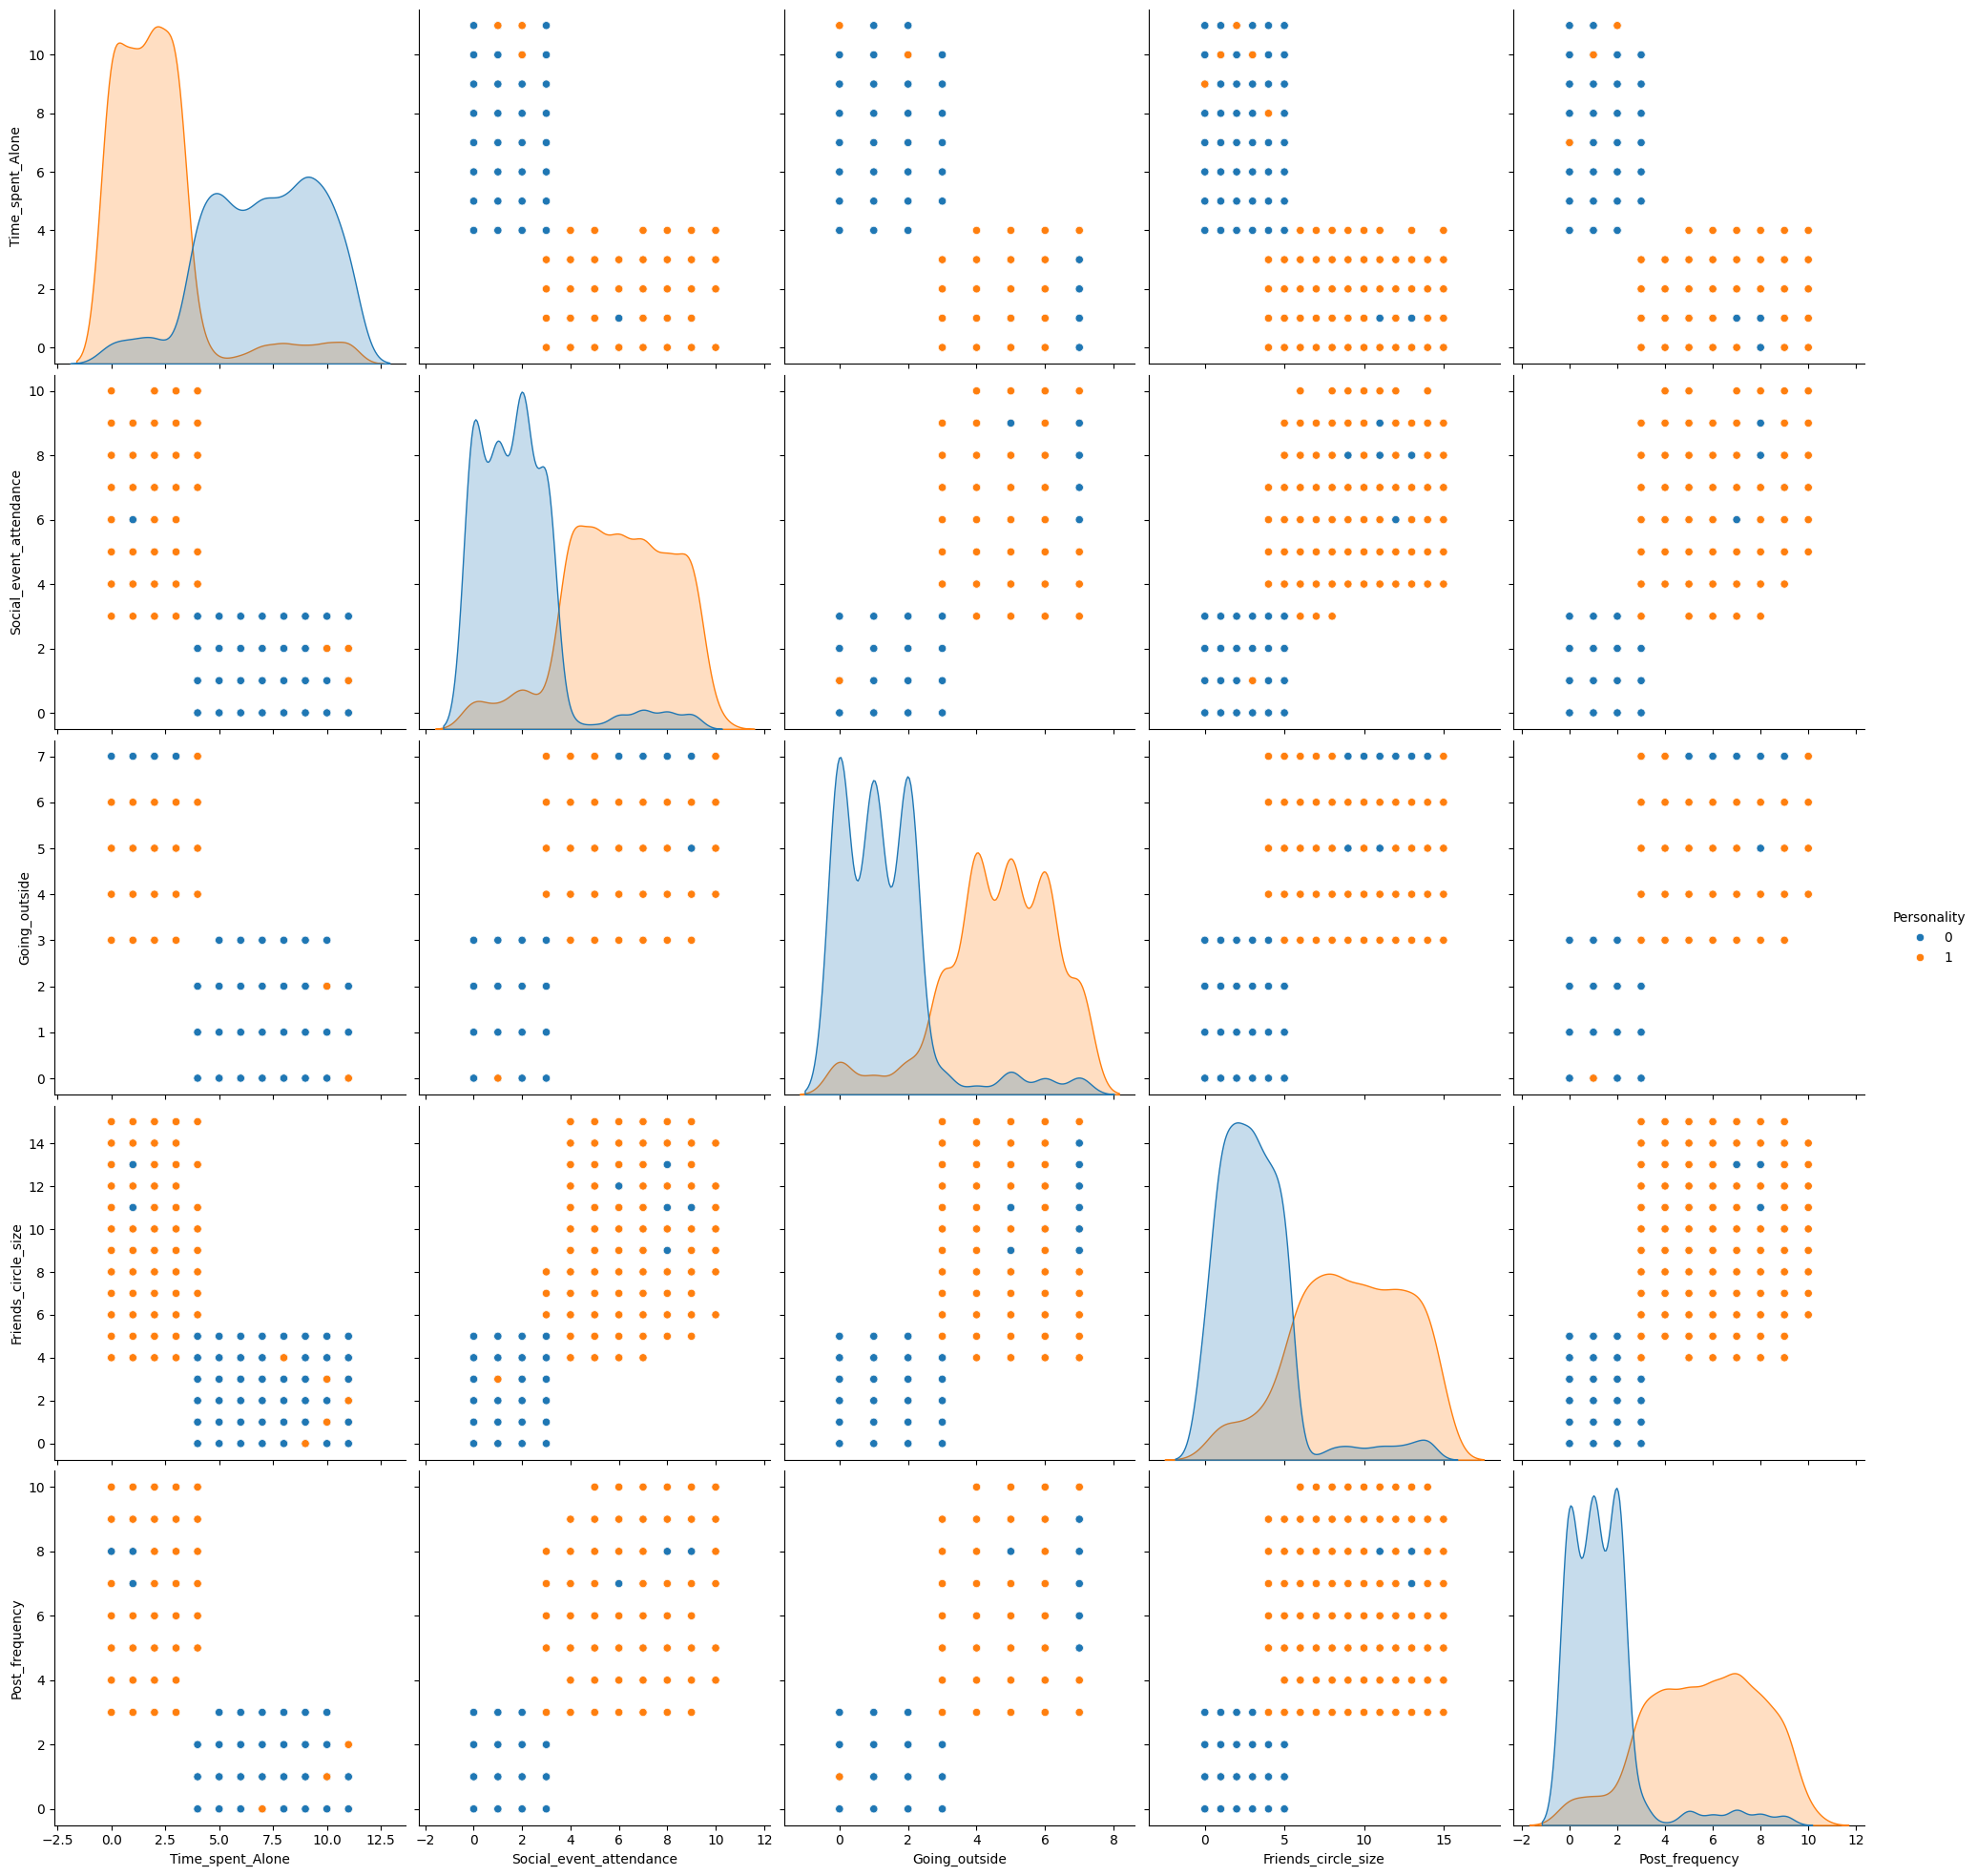

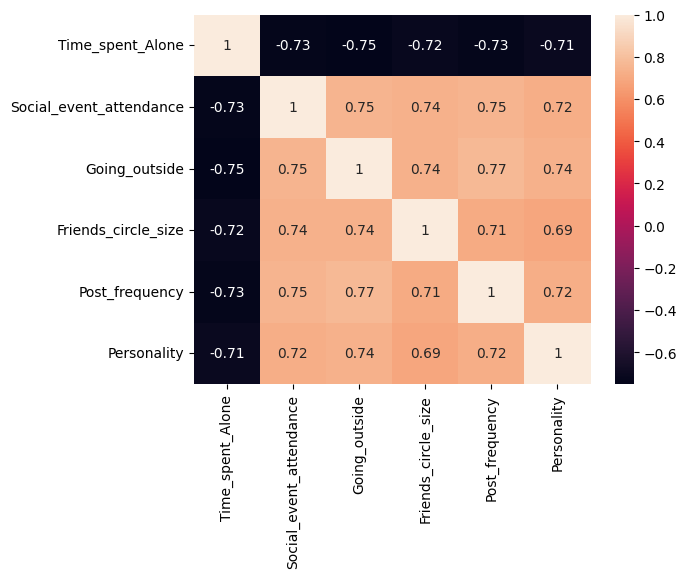

In [31]:
plt.figure()#este es por si quiero un tamaño especifico de las graficas
sns.pairplot(XDB,hue='Personality',size=4, vars=['Time_spent_Alone','Social_event_attendance','Going_outside', 'Friends_circle_size', 'Post_frequency'])  #hue es el valor de salida, size es la cantidad de valores de entrada y vars son los v de entrada
plt.show()

plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

3. Se procede con la implementación del modelo de clusterización

In [72]:
# Implementación de K-Means
XD=XDB[['Time_spent_Alone','Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
yd=XDB[['Personality']]

#Se van a crear cinco montoncitos de datos (perfiles de credito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc, random_state=42)
mkm.fit(XD,yd)
centroides=mkm.cluster_centers_
print("Los centroides son:\n", centroides)

#Como quedaron clasificadas las personas
labels=mkm.labels_
print("Los labels son:\n", labels)
XDB["Labels"]=labels
display(XDB)
# Caracterización de los clusters
ND = np.bincount(labels)  # Número de individuos por cluster
print("Tamaño de los clusters:\n", ND)

# Mostrar el número de individuos por cluster
for i, count in enumerate(ND):
    print(f"El cluster {i} tiene {count} individuos.")

# Conteo de extrovertidos e introvertidos por cluster
extrovertidos = XDB.groupby("Labels")["Personality"].apply(lambda x: (x == 1).sum())
introvertidos = XDB.groupby("Labels")["Personality"].apply(lambda x: (x == 0).sum())

# Porcentajes
pct_extrovertidos = (extrovertidos / ND) * 100
pct_introvertidos = (introvertidos / ND) * 100

# Mostrar los resultados
print("\nNúmero de extrovertidos por cluster:")
print(extrovertidos.to_frame().reset_index().to_string(index=False))

print("\nNúmero de introvertidos por cluster:")
print(introvertidos.to_frame().reset_index().to_string(index=False))

print("\nPorcentaje de extrovertidos por cluster:")
print(pct_extrovertidos.to_frame().reset_index().to_string(index=False))

print("\nPorcentaje de introvertidos por cluster:")
print(pct_introvertidos.to_frame().reset_index().to_string(index=False))

Los centroides son:
 [[ 9.4186747   1.42319277  1.02560241  2.625       1.01957831]
 [ 1.52316076  6.35149864  4.95367847 11.2506812   4.08174387]
 [ 1.53432282  6.35621521  4.97217069  6.91836735  6.41372913]
 [ 1.51670951  6.62982005  5.07969152 12.57326478  7.41388175]
 [ 5.51277955  1.44408946  1.01277955  2.6629393   1.08626198]]
Los labels son:
 [1 0 0 ... 3 4 2]


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Labels,labels
0,4.0,4.0,6.0,13.0,5.0,1,1,1
1,9.0,0.0,0.0,0.0,3.0,0,0,0
2,9.0,1.0,2.0,5.0,2.0,0,0,0
3,0.0,6.0,7.0,14.0,8.0,1,3,3
4,3.0,9.0,4.0,8.0,5.0,1,2,2
...,...,...,...,...,...,...,...,...
2893,9.0,2.0,0.0,4.0,2.0,0,0,0
2895,3.0,7.0,6.0,6.0,6.0,1,2,2
2896,3.0,8.0,3.0,14.0,9.0,1,3,3
2897,4.0,1.0,1.0,4.0,0.0,0,4,4


Tamaño de los clusters:
 [664 369 539 387 626]
El cluster 0 tiene 664 individuos.
El cluster 1 tiene 369 individuos.
El cluster 2 tiene 539 individuos.
El cluster 3 tiene 387 individuos.
El cluster 4 tiene 626 individuos.

Número de extrovertidos por cluster:
 Labels  Personality
      0           75
      1          350
      2          523
      3          346
      4           34

Número de introvertidos por cluster:
 Labels  Personality
      0          589
      1           19
      2           16
      3           41
      4          592

Porcentaje de extrovertidos por cluster:
 Labels  Personality
      0    11.295181
      1    94.850949
      2    97.031540
      3    89.405685
      4     5.431310

Porcentaje de introvertidos por cluster:
 Labels  Personality
      0    88.704819
      1     5.149051
      2     2.968460
      3    10.594315
      4    94.568690


4.Se procede a evaluar el modelo (la matriz de confusión)

In [86]:
cluster_mapping = (extrovertidos/ ND).round()
predicted_yd = labels.copy()

# Pronóstico basado en clusters
ydp = np.zeros((len(XD), 1))
Vdisease = np.array(pct_introvertidos)

for i in range(nc):
    predicted_yd[predicted_yd == i] = cluster_mapping[i]

# Convertir a array para la matriz de confusión
true_yd = yd.values.ravel()
conf_matrix = confusion_matrix(true_yd, predicted_yd)
print("Matriz de confusión:")
print(conf_matrix)


# Calcular métricas
VN = conf_matrix[0,0]; FP = conf_matrix[0,1]
FN = conf_matrix[1,0]; VP = conf_matrix[1,1]
Exactitud = (VP + VN) / (VP + VN + FP + FN)
Sensibilidad = VP / (VP + FN)
Especificidad = VN / (VN + FP)
Precision = VP / (VP + FP)
Tasa_error = (FP + FN) / (VP + VN + FP + FN)

print("Exactitud:", Exactitud)
print("Sensibilidad:", Sensibilidad)
print("Especificidad:", Especificidad)
print("Precisión:", Precision)
print("Tasa de error:", Tasa_error)

Matriz de confusión:
[[1181   76]
 [ 109 1219]]
Exactitud: 0.9284332688588007
Sensibilidad: 0.9179216867469879
Especificidad: 0.939538583929992
Precisión: 0.9413127413127413
Tasa de error: 0.07156673114119923


#**ARBOLES DE DECISIÓN**

0. Se hace la carga de los datos

In [71]:
# las dos librerias cientificas
import numpy as np
import pandas as pd

#las librerias del arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. preparación y selección de datos

In [77]:
nxl='/content/drive/MyDrive/SEMESTRE-6/personality_dataset.xlsx'
XDB1=pd.read_excel(nxl)
XDB1=XDB1[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']]
XDB1=XDB1.dropna()
XDB1.head(100) #mostrar 100 lineas del archivo

#seleccionar las variables
XD2=XDB1[['Time_spent_Alone','Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
yd2=XDB1[['Personality']]



2. Se procede a implementar el modelo

In [78]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD2,yd2)
#se procede con la grafica
from pydotplus import graph_from_dot_data #me crea la grafica
from sklearn.tree import export_graphviz#me exporta a PNG, JPEG,TIFF

ve=['Time_spent_Alone','Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'] #nombres para el arbol
dot_data=export_graphviz(mar,feature_names=ve) #le dije que exporte el arbol y que le coloque los nombres para el grafico
graph=graph_from_dot_data(dot_data)
graph.write_png('2.ArbolDecision_FINAL.png')

True

3. Se procede con el pronostico

In [84]:
XDB0=pd.read_excel(nxl) #leemos la hoja del excel
XDB0.head(100)

#se crea la base de datos a pronosticar

XD1=XDB0[['Time_spent_Alone','Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
yd0=XDB0[['Personality']]

#determinar las filas de los solicitantes que no poseen preapro
filas=np.where(np.isnan(yd0)) [0] #aqui le estoy pidiendo que me diga cuales son las filas en las que los solicitantes no tienen preapr

XD0=np.array(XD1)
#XD0=XD0[filas]

#LE CALCULAMOS LA PREAPROBACION A LOS SOLICITANTES
y_pred=mar.predict(XD0)

#se crea el informe de excel
df=pd.DataFrame(np.column_stack((XD0,y_pred,yd0))) #armamos tabla filas para los que no tienen pre, las variables con XD0 y y_pred para el pronostico
df.columns=['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']
df.to_excel("Evaluacion ocupacion.xlsx")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


4. Evaluar el comportamiento del modelo

In [85]:
from re import S
ydp=mar.predict(XD) #PRONOSTICO SOBRE LA BASE DE DATOS ORIGINAL
cm=confusion_matrix(yd,ydp)
print("La matriz de  confusion es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
predneg=VN/(VN+FN)
print("Tasa de error:",TasaError)
print("Tasa de prediccion negativa:",predneg)
print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)
print("Precision:",Precision)

La matriz de  confusion es:
 [[1181   76]
 [ 109 1219]]
Tasa de error: 0.07156673114119923
Tasa de prediccion negativa: 0.9155038759689923
Exactitud: 0.9284332688588007
Sensibilidad: 0.9179216867469879
Especificidad: 0.939538583929992
Precision: 0.9413127413127413


#**ANALISIS**

**Clustering K-Means**

Con el propósito de segmentar a los individuos en grupos homogéneos según sus características conductuales y sociales, se implementó un modelo de agrupamiento no supervisado mediante el algoritmo K-Means. Para este modelo se utilizaron como variables de entrada:

	•	Time spent Alone
	•	Social event attendance
	•	Going outside
	•	Friends circle size
	•	Post frequency

Se excluyó la variable Personality del proceso de entrenamiento, ya que se trata de un modelo no supervisado. El número de clusters definido fue de 5, con el objetivo de identificar patrones naturales dentro de los datos, sin usar etiquetas previas.

Resultados principales:

	•	El cluster con mayor número de individuos fue el Cluster 0.
	•	Se observaron diferencias significativas en la proporción de extrovertidos e introvertidos en cada cluster:
	•	El Cluster 1 tuvo el mayor porcentaje de extrovertidos.
	•	El Cluster 3 presentó el mayor porcentaje de introvertidos.
	•	La caracterización por cluster mostró una distribución variada de comportamientos sociales y actividades individuales, lo cual puede ser indicativo de perfiles conductuales distintos.

Evaluación del Modelo:

Para validar la utilidad del agrupamiento, se generó una matriz de confusión cruzando la personalidad real (Introvertido/Extrovertido) con las etiquetas de cluster más representativas.

	•	Exactitud: 92.84%
	•	Sensibilidad: 91.79%
	•	Especificidad: 93.95%
	•	Precisión: 94.13%
	•	Tasa de error: 7.16%

Estos valores reflejan que el modelo de K-Means logró una segmentación altamente coherente con la personalidad real de los individuos. Aunque no es un modelo supervisado, al relacionar los clusters con las etiquetas reales, se evidencia una fuerte correspondencia entre los perfiles generados automáticamente y la variable objetivo (Personalidad).
Esto sugiere que las variables empleadas para agrupar —como tiempo solo, frecuencia de salidas, tamaño del círculo social y uso de redes sociales— son efectivas para identificar patrones conductuales que distinguen entre extroversión e introversión.



**Árboles de Decisión**

Con el fin de complementar el análisis y generar reglas claras de clasificación, se implementó un modelo de Árbol de Decisión supervisado, con una profundidad máxima de 4. Este modelo busca predecir la personalidad del individuo (Introvertido/Extrovertido) en función de las siguientes variables:

	•	Time spent Alone
	•	Social event attendance
	•	Going outside
	•	Friends circle size
	•	Post frequency

Resultados del modelo:

	•	La variable más influyente fue Time spent Alone, seguida por Social event attendance y Friends circle size.
	•	En la raíz del árbol, se observó una primera división relacionada con altos niveles de tiempo en soledad, lo cual es un fuerte predictor de personalidad introvertida.
	•	Las actividades sociales y la frecuencia de publicaciones también ayudaron a discriminar entre extrovertidos e introvertidos en ramas posteriores.

Evaluación del Modelo:

Se evaluó el desempeño del árbol con base en la matriz de confusión obtenida al comparar los valores reales con los predichos:

	•	Exactitud: 92.84%
	•	Sensibilidad: 91.79%
	•	Especificidad: 93.95%
	•	Precisión: 94.13%
	•	Tasa de error: 7.16%

El modelo tiene un desempeño muy sólido, tanto en la identificación de introvertidos como de extrovertidos. La alta precisión y sensibilidad indican que rara vez confunde a un individuo extrovertido con uno introvertido, y viceversa. Además, la especificidad elevada resalta que el modelo también es eficaz en evitar falsos positivos.

En conjunto con el análisis del árbol de decisión, estos resultados sugieren que las variables utilizadas (principalmente comportamiento social) son altamente predictivas del tipo de personalidad, lo que valida tanto la calidad de los datos como el enfoque del modelo.

**Conclusiones Generales**

- Time spent Alone fue el predictor más fuerte en ambos enfoques, seguido por variables relacionadas con la socialización.
- El modelo de K-Means permitió identificar cinco perfiles conductuales distintos, lo cual puede ser útil para aplicaciones en psicología, marketing personalizado o diseño de ambientes laborales.
- El Árbol de Decisión ofreció una herramienta clara y precisa para la clasificación automática de nuevos individuos, con una exactitud superior al 92%.
- El uso conjunto de técnicas supervisadas y no supervisadas permitió comprender tanto los patrones latentes de comportamiento como las reglas explícitas para su clasificación.